### UBC Extended Learning
#### Instructor: Socorro Dominguez
#### Module 04

Overview:

- [] Explain the notion of similarity-based algorithms.
- [] Broadly describe how 𝑘-NNs use distances.
- [] Describe the effect of using a small/large value of the hyperparameter 𝑘 when using the 𝑘-NN algorithm.
- [] Explain the problem of curse of dimensionality.
- [] Explain the general idea of SVMs with RBF kernel.
- [] Compare and contrast 𝑘-NNs and SVM RBFs.
- [] Broadly describe the relation of gamma and C hyperparameters with the fundamental tradeoff.

### Euclidean Distance

$d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2}$

### K-NN

- K-NN is a simple yet powerful machine learning algorithm used for both classification and regression tasks.

**What is K-NN?**
- K-NN is a non-parametric algorithm that makes predictions based on the similarity between input data points.
- It belongs to the instance-based learning family, where the model doesn't explicitly learn a function, but instead, stores the training instances to make predictions.
- The algorithm assumes that similar instances exist in close proximity to each other in the feature space.

**How does K-NN work?**
- K-NN works in the following steps:
  1. Load the training dataset.
  2. Choose the value of K (the number of nearest neighbors to consider).
  3. For each unseen instance:
     - Calculate the distance (e.g., Euclidean distance) between the instance and all training data points.
     - Select the K nearest neighbors based on the calculated distances.
     - Assign the class (for classification) or calculate the average value (for regression) of the K nearest neighbors as the predicted output.
     - Output the predicted class or value.
     
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)


**Example: Classifying Fruits**
- Let's consider a simple example of classifying fruits based on their weight and color.
- We have a dataset of fruits with three classes: Apples, Oranges, and Bananas.
- The dataset contains features such as weight (in grams) and color (1 for red, 2 for orange, 3 for yellow).
- Our task is to classify a new fruit based on its weight and color.

**Dataset Visualization**
- We visualize the training dataset on a scatter plot.
- Each point represents a fruit, with its weight on the x-axis and color on the y-axis.
- Apples are marked in red, oranges in orange, and bananas in yellow.

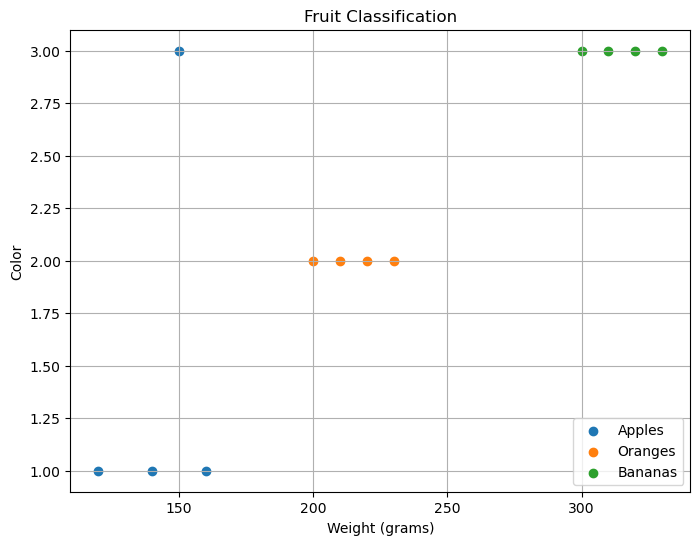

In [2]:
import matplotlib.pyplot as plt

# Example data
fruits = {
    'Apples': {'weight': [120, 140, 150, 160], 'color': [1, 1, 3, 1]},
    'Oranges': {'weight': [200, 210, 220, 230], 'color': [2, 2, 2, 2]},
    'Bananas': {'weight': [300, 310, 320, 330], 'color': [3, 3, 3, 3]}
}

# Scatter plot
plt.figure(figsize=(8, 6))
for fruit, data in fruits.items():
    plt.scatter(data['weight'], data['color'], label=fruit)
plt.xlabel('Weight (grams)')
plt.ylabel('Color')
plt.title('Fruit Classification')
plt.legend()
plt.grid(True)
plt.show()

**Finding Nearest Neighbors**
- Suppose we have a new fruit with weight 150g and color code 2 (orange).
- We choose a value for K, let's say K = 3.
- The algorithm calculates the distances between the new fruit and all the training instances.
- The three closest fruits (nearest neighbors) are selected based on the distances.

**Voting for Classification**
- Since we are performing classification, we consider the majority class of the nearest neighbors.
- Let's assume the three nearest neighbors are Apple, Orange, and Orange.
- Based on majority voting, the predicted class for the new fruit is Orange.

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Finding Nearest Neighbors
# Example data
X_train = [[130, 1], [140, 1], [150, 3], [160, 1]]
y_train = ['Apple', 'Apple', 'Orange', 'Orange']

In [5]:
# Create a new instance
X_new = np.array([[150, 2]])



In [9]:
# Create and fit the K-NN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the class of the new instance
prediction = knn.predict(X_new)

print(f"Predicted class: {prediction[0]}")

Predicted class: Orange


**Pros and Cons**
- Pros of K-NN:
  - Simple and intuitive algorithm.
  - No assumption about the underlying data distribution.
  - Can handle multi-class classification and regression tasks.
- Cons of K-NN:
  - Computationally expensive for large datasets.
  - Sensitivity to irrelevant features.
  - Requires proper scaling of features.

**Conclusion**
- K-Nearest Neighbors (K-NN) is a popular machine learning algorithm for classification and regression tasks.
- It predicts the class or value of an unseen instance based on the similarity to its K nearest neighbors.
- By understanding K-NN, we can leverage its simplicity and versatility to solve various real-world problems.

### SVM

- SVM is also used for both classification and regression tasks.

**What is SVM?**
- Support Vector Machines (SVM) is a linear model that separates classes by finding the best hyperplane in a high-dimensional feature space.
- It is based on the concept of maximum margin, which aims to maximize the distance between the separating hyperplane and the nearest data points.
- SVM can handle both linearly separable and non-linearly separable data using different kernel functions.

**How does SVM work?**
- SVM works in the following steps:
  1. Load the training dataset.
  2. Define the kernel function and parameters.
  3. Find the optimal hyperplane that maximizes the margin between classes.
  4. Classify new instances by determining which side of the hyperplane they belong to.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/600px-SVM_margin.png)

**Linear SVM**
- In the case of linearly separable data, SVM finds a linear hyperplane that separates the classes.
- The hyperplane is determined by the support vectors, which lie closest to the decision boundary.

**Non-Linear SVM**
- SVM can handle non-linearly separable data by using kernel functions.
- Kernel functions transform the data into a higher-dimensional space, where a linear hyperplane can separate the classes.
- Popular kernel functions include the Gaussian (RBF) kernel and polynomial kernel.

**Decision Boundary**
- The decision boundary is the line, curve, or surface that separates the classes in the feature space.
- SVM aims to find the decision boundary that generalizes well to unseen data.

**Pros and Cons**
- Pros of SVM:
  - Effective in high-dimensional spaces.
  - Can handle both linearly separable and non-linearly separable data.
  - Provides good generalization ability with the maximum margin concept.
- Cons of SVM:
  - Computationally expensive for large datasets.
  - Sensitivity to the choice of kernel and parameters.
  - Can be difficult to interpret the resulting model.